In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from PIL import Image
import scipy.ndimage as ndimage
# %matplotlib qt

In [2]:
np.set_printoptions(suppress=True)

In [3]:
file_path = r"C:\Users\Patrick\OneDrive - UNSW\Amalia rock 10-2\Patrick 10-2 after cut face close to 2\10-2 after cut face close to 2 grey scale no legend\XRF_closeTo2_afterCut_masked_Stack1.tiff"

In [4]:
#load the images
dataset = Image.open(file_path)
h,w = np.shape(dataset)
tiffarray = np.zeros((h,w,dataset.n_frames))
for i in range(dataset.n_frames):
   dataset.seek(i)
   tiffarray[:,:,i] = np.array(dataset)
# expim = tiffarray.astype(np.double);
expim = tiffarray.astype(np.uint8);
print(expim.shape)

(633, 642, 9)


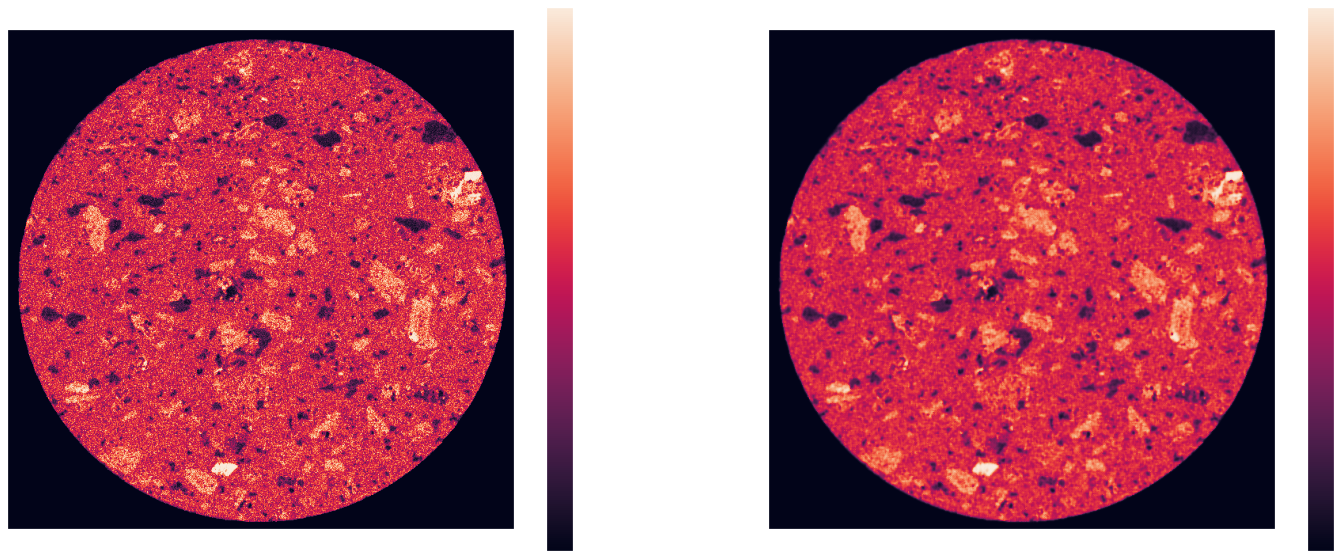

In [5]:
# apply bilateral filtering on images to preserve edges
import cv2

test = expim[:,:,6]
blur = cv2.bilateralFilter(test,5,100,100)  

fig = plt.figure(figsize=(25,25))
plt.subplot(121),plt.imshow(test)

plt.colorbar(shrink=0.4).set_ticks([])
# plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur)

plt.colorbar(shrink=0.4).set_ticks([])
# plt.title('Blurred')
plt.xticks([]), plt.yticks([])


plt.show()

In [6]:
# perform bilateral filtering on Na and Mg

# Na
Na_smooth = expim[:,:,6]
# Mg
Mg_smooth = expim[:,:,4]

#perform the bilaterial filering
Mg_smooth = cv2.bilateralFilter(expim[:,:,4],5,75,75)
Na_smooth = cv2.bilateralFilter(expim[:,:,6],5,75,75)

#replace the 
expim[:,:,4] = Mg_smooth
expim[:,:,6] = Na_smooth

In [7]:
pixel_values = expim.reshape((-1,dataset.n_frames))
pixel_values.shape

(406386, 9)

In [8]:
# convert to float
pixel_values = np.float32(pixel_values)

In [9]:
# oerfirn K-means clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7)
kmeans.fit(pixel_values)
y_kmeans = kmeans.predict(pixel_values)
centers = kmeans.cluster_centers_
centers

array([[149.59387   ,  32.625854  , 101.56468   , 107.084045  ,
         89.81827   ,  85.40659   , 134.33289   , 149.64053   ,
        105.37193   ],
       [  0.21855164,   0.05975723,   0.14476013,   0.19869995,
          0.42536926,   0.1308899 ,   0.45767212,   0.22383118,
          0.47329712],
       [117.646286  ,  23.4352    , 133.82343   ,  42.804928  ,
        129.59317   , 146.00342   , 112.47034   , 141.70518   ,
        107.76869   ],
       [164.23624   ,  29.994555  ,  81.45637   , 175.96814   ,
         79.60841   ,  72.18845   , 134.99652   , 159.63834   ,
        102.36922   ],
       [ 61.828293  , 150.57086   , 142.66461   ,  37.45094   ,
         66.202614  ,  88.41694   ,  74.38353   ,  66.42738   ,
        153.3677    ],
       [183.03845   ,  16.449883  ,  42.441387  ,  25.494484  ,
         72.3409    ,  57.244923  , 177.6352    , 182.27925   ,
         91.92561   ],
       [ 69.86656   ,  18.57763   , 217.82893   ,  18.658775  ,
        209.6358    , 223.9683

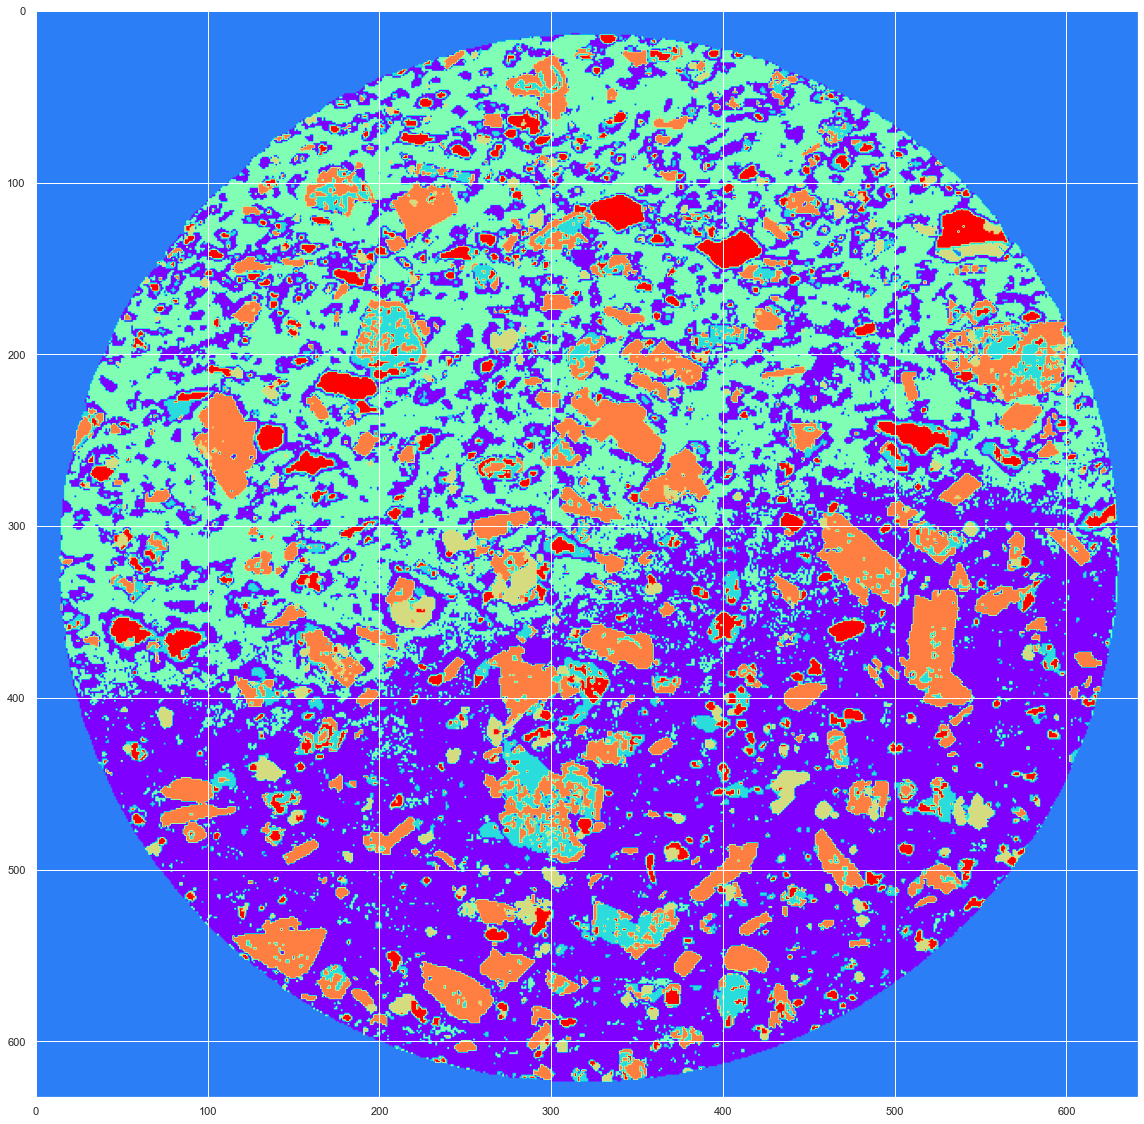

In [10]:
label_img = y_kmeans.reshape(expim.shape[0],expim.shape[1])
plt.figure(figsize=(20,20))
plt.imshow(label_img,cmap='rainbow')